# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)


In [2]:
df = pd.read_csv('./data/airbnb_hw.csv', low_memory=False)
print( df.shape, '\n')
df.head()
price = df['Price']
price.unique()

(30478, 13) 



array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

> The price variable comes in as text: We need to convert it to numeric (float or integer). The problem is the commas for prices over 999: 3,390 is interpreted by Pandas as a string rather than an integer. 

In [3]:
price = df['Price']
price = price.str.replace(',','') # Replace commas with nothing
print( price.unique() , '\n')
price = pd.to_numeric(price,errors='coerce') # Typecast price to float/numeric
print( price.unique() , '\n')
print( 'Total missing: ', sum( price.isnull() ) ) # This converts all the values

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' '47


2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.


In [4]:
df = pd.read_csv('./data/mn_police_use_of_force.csv')
df.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [5]:
df['subject_injury'].value_counts()

subject_injury
Yes    1631
No     1446
Name: count, dtype: int64

In [6]:
df['subject_injury'] = df['subject_injury'].fillna('Missing') # Replace missings with a new category
print(df['subject_injury'].value_counts())

subject_injury
Missing    9848
Yes        1631
No         1446
Name: count, dtype: int64


> Yikes, the vast majority of values are missing (76%). This is a bad sign. This is one of the variables we are most interested in, and it would be easy to just check the 'No' box on the form. Perhaps there's some administrative reason they're missing (e.g. the value is recorded only if a medical professional is available).

In [7]:
pd.crosstab( df['subject_injury'], df['force_type'],normalize=True) # Cross tabulate injury with force type

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
Missing,0.000155,0.545532,0.109942,0.000000,0.002089,0.005725,0.006731,0.000000,0.013153,0.002398,0.076209
No,0.000000,0.084565,0.010135,0.000155,0.002553,0.002631,0.000000,0.000077,0.000000,0.000155,0.011605
Yes,0.000155,0.099497,0.003172,0.000000,0.003404,0.003095,0.000000,0.000155,0.000000,0.003404,0.013308


> It appears the vast majority of missings are involved in Chemical Irritant or Bodily Force situations. The other categories are, of course, serious and might correspond to significant harm in particular cases (e.g. Firearm, Maximal Restraint Technique, Taser). But if I were involved in police oversight, I would focus on improving reporting in Bodily Force and Chemical Irritant cases, and then begin auditing specific cases where the `subject_injury` code was missing. 

In [8]:
df['subject_injury'] = df['subject_injury'].fillna('Missing')

3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.

In [9]:
df = pd.read_csv('./data/metabric.csv')
df.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [10]:
remap = {'0:LIVING':0,'1:DECEASED':1}
df['Overall Survival Status'] = df['Overall Survival Status'].map(remap)

4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [11]:
df = pd.read_csv('./data/airbnb_NYC.csv',encoding='latin-1')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


<Axes: xlabel='RSR_imp', ylabel='Density'>

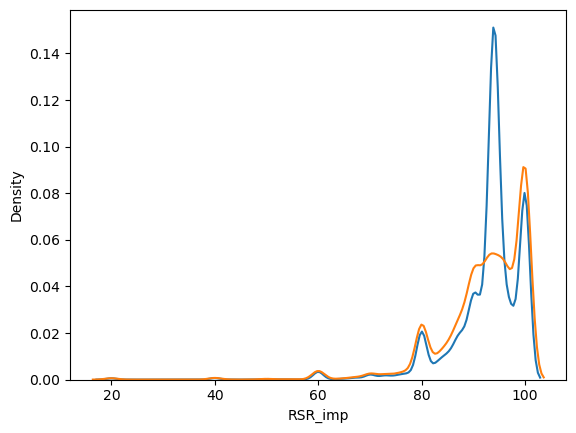

In [12]:
na_value = np.median(df.loc[ df['Review Scores Rating'].isna()==False, 'Review Scores Rating'])
df['RSR_imp'] = df['Review Scores Rating'].fillna(na_value)

sns.kdeplot(df['RSR_imp'], label = 'Imputed')
sns.kdeplot(df['Review Scores Rating'], label='Original')

> 

> Doing this imputation creates a large spike at 98 which isn't present in the original data. This is going to bias algorithms towards predicting 98, when it's just an artifact of the imputation process.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [13]:
#1. 
df = pd.read_excel('./data/GSAF5.xls')
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#2. 
df = df.iloc[:,:20]
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,Right thigh and lower leg stripped of flesh,Y,?,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,No injury shark knocked man of his board,N,1100hrs,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,Puncture wounds to right knee,N,1815hrs,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,Minor cuts and abrasions,N,0830hrs,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,None reported damage to board,N,1145hrs,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN


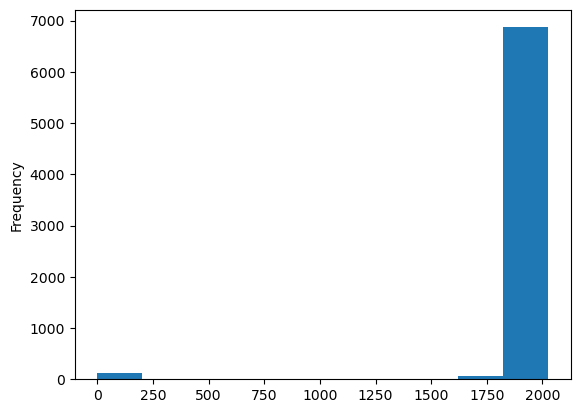

<Axes: ylabel='Frequency'>

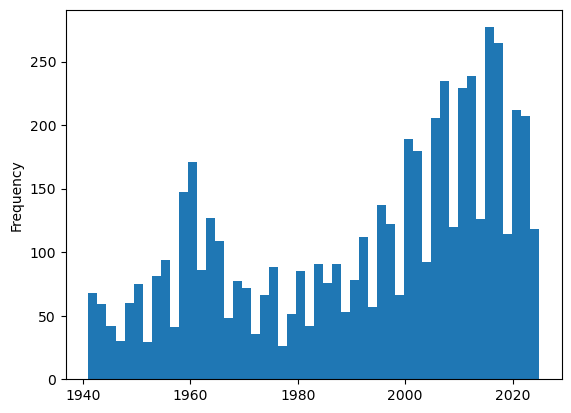

In [15]:
#3. 
df['Year'].plot.hist()
plt.show()

tdf = df.loc[ (df['Year']>1940)*(df['Year']<2026),:]
tdf['Year'].plot.hist(bins=50)

> These data contain some very old reports of ancient shark attacks. If we drop those and focus on attacks since 1940, it seems like the frequency spikes around 1960, and then increases from the late 1990s until the late 2010's, when it decreases again.

['13' '?' '39' '11' '27' '12' '26' '56' '55' '24' '25' '61' '40' '14'
 '50+' '54' '48' '57' '8' '63' '9' '19' '7' '85' '69' '18' '66' '21' '37'
 '16' '20' '42' '45' '30' '30+' '40+' '29' 35 58 29 24 20 55 17 12 37 36
 23 40 28 69 48 '60+' 57 45 61 27 38 16 68 33 30 15 41 14 43 26
 'Middle age' 18 21 49 25 46 19 65 64 nan '46' '32' '10' '64' '62' '22'
 '15' '52' '44' '47' '59' '50' '34' '38' '30s' '20/30' '35' '65' '20s'
 '77' '60' '49' '!2' '73' '50s' '58' '67' '17' '6' '41' '53' '68' '43'
 '51' '31' 39 51 10 13 60 '40s' 62 'teen' 8 22 32 56 'Teen' 42 50 'M' 9 31
 11 34 '!6' '!!' 47 7 71 59 53 54 75 '45 and 15' 73 52 70 4 63 44
 '28 & 22' '22, 57, 31' '60s' "20's" 67 74 '9 & 60' 'a minor' 6 3 82 '40?'
 66 72 '23' '36' '71' '70' '18 months' '28' '33' '74' '3' '28 & 26' '5'
 '86' '18 or 20' '12 or 13' '46 & 34' '28, 23 & 30' 'Teens' 77 '36 & 26'
 '8 or 10' 84 '\xa0 ' ' ' '30 or 36' '6½' '21 & ?' '33 or 37' 'mid-30s'
 '23 & 20' 5 ' 30' '7      &    31' ' 28' '20?' "60's" '32 & 30'
 '16 to

<Axes: ylabel='Frequency'>

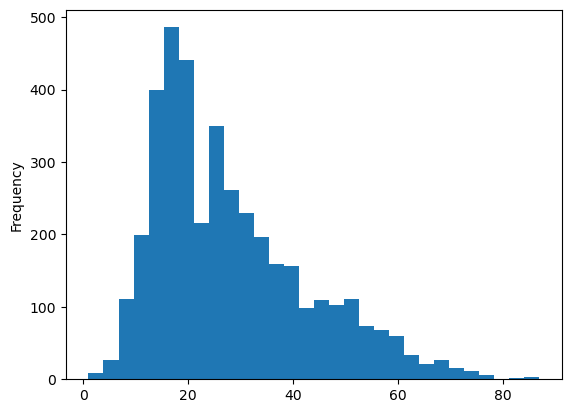

In [16]:
#4. Age

print(df['Age'].unique())
temp = df['Age'].copy()
temp = temp.fillna('') # Replace NAs with empty string
temp = temp.astype(str) # Coerce all to string

temp = temp.str.replace(' ','')
temp = temp.str.replace('!','')
temp = temp.str.replace('18months','2')
temp = temp.str.replace('+','')
temp = temp.str.replace('40s','55')
temp = temp.str.replace('40s','45')
temp = temp.str.replace('30s','35')
temp = temp.str.replace('20s','25')
temp = temp.str.replace('Teen','15')
temp = temp.str.replace('teen','15')
temp = temp.str.replace('60s','65')
temp = temp.str.replace('6½','6')
temp = temp.str.replace('62½','6')
temp = temp.str.replace('8or10','9')
temp = temp.str.replace('8or10','9')
temp = temp.str.replace('&?','')
temp = temp.str.replace('?&','')
temp = temp.str.replace("'s",'')

temp = pd.to_numeric(temp,errors='coerce')

df['age'] = temp

df['age'].plot.hist(bins=30)

In [17]:
#5.

df['Type'].value_counts()
temp = df['Type']

temp = temp.str.replace('Invalid','Unknown')
temp = temp.str.replace('Watercraft','Unprovoked')
temp = temp.str.replace('Sea Disaster','Unprovoked')
temp = temp.str.replace('Boat','Unprovoked')
temp = temp.str.replace(' ','')
temp = temp.str.replace('Questionable','Unknown')
temp = temp.str.replace('Unconfirmed','Unknown')
temp = temp.str.replace('?','Unknown')
temp = temp.str.replace('Unverified','Unknown')
temp = temp.str.replace('Underinvestigation','Unknown')

temp = temp.fillna('Unknown')

df['type'] = temp

print(df['type'].value_counts())

print('Proportion of unprovoked attacks is: ', 5755/(5755+639))


type
Unprovoked    5829
Provoked       644
Unknown        600
unprovoked       1
Name: count, dtype: int64
Proportion of unprovoked attacks is:  0.9000625586487332


In [18]:
#6.

print(df['Fatal Y/N'].value_counts())
temp = df['Fatal Y/N']
temp = temp.astype(str)

temp = temp.str.replace('M','Unknown')
temp = temp.str.replace('n','N')
temp = temp.str.replace('Nq','N')
temp = temp.str.replace('UNKNOWN','Unknown')
temp = temp.str.replace('UNkNowN','Unknown')
temp = temp.str.replace('F','Unknown')
temp = temp.str.replace('NaN','Unknown')
temp = temp.str.replace('2017','Unknown')
temp = temp.str.replace('Y x 2','Y')
temp = temp.str.replace(' N','N')
temp = temp.str.replace('N ','N')
temp = temp.str.replace('y','Y')

temp = temp.fillna('Unknown')

df['fatal'] = temp

print(df['fatal'].value_counts())

print('Proportion of fatal attacks is: ', 1470/(1470+4880))

Fatal Y/N
N          4933
Y          1488
UNKNOWN      71
 N            7
F             5
M             3
n             1
Nq            1
2017          1
Y x 2         1
N             1
y             1
Name: count, dtype: int64
fatal
N          4943
Y          1490
Unknown     641
Name: count, dtype: int64
Proportion of fatal attacks is:  0.231496062992126


In [19]:
# 8. 

print( pd.crosstab(df['fatal'], df['type']) )

print('Provoked fatality rate: ', 21/(21+609))
print('Unprovoked fatality rate: ', 1433/(1433+4228))

type     Provoked  Unknown  Unprovoked  unprovoked
fatal                                             
N             614       43        4285           1
Unknown         9      537          95           0
Y              21       20        1449           0
Provoked fatality rate:  0.03333333333333333
Unprovoked fatality rate:  0.2531354884296061


> More likely to be fatal when it's unprovoked. So if you bother a shark, it will probably leave you alone. But if it bothers you... you have a 3/4 shot of surviving.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

    1. Read the abstract. What is this paper about?

> Wickham is interested in thinking more abstractly about the process of data cleaning, which probably doesn't receive as much attention as it should. Removing `NA`'s is great, but beyond that, what should data look like in order to decide you're done cleaning? He introduces a criteria (each row is an observation, each column is a variable, each type of observational unit is a table) and explore the consequences.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish? 
  
> Despite being a large part of data analysis --- both in terms of the time it requires and the coneceptual effort invested in it --- data cleaning is understudied as a skill or activity. The "tidy data standard" is meant to standardize data cleaning. The goal of the standard is to make it easier to clean data, since everyone involved knows what the objective is and the usual steps required to succeed. 
  
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  
> The idea in the first sentence is that dysfunctional and messy data often present unique or novel problems, while clean data all have similar properties. You have probably experienced this already: Whoever created the data structured it for their purposes or out of convenience, and manipulating it successful within R requires substantial effort. This is a Russian literature joke. The second sentence acknowledges that the idea of a "Data frame/matrix" is intuitive -- a row is an observation, a column is a variable -- but in practice, this is a choice that often benefits the analyst if it is made consciously. For example, if you have data for counties by year, what "are" your data? An observation is a county-year, which might not be obvious to someone who hasn't played with that kind of data before, who might conclude that an observation is a county; this would lead to a lot of unintentionally bad choices about cleaning and organizing the data.
  
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  
  > A dataset is a collection of values. Values are numeric or categorical/strings. Every value belongs to both a variable and an observation. A variable is a collection of values that measure the same attribute or property (e.g. height, color, temperature, make/model).  An observation is a collection of values that measure it.
  
  5. How is "Tidy Data" defined in section 2.3?
  
> In tidy data, each variable is a column, each observation is a row, and each type of observational unit is a table. If data is not tidy, it is messy. 
  
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  
> 1. Column headers are values (like year), and not variable names. So for example, unemployment by county over time is represented as a matrix where columns are years and rows are counties. The column header is really a numeric like 2012, which is a value, not a variable name, like "Year". 2. Multiple variables are stored in one column. For example, month-day-year dates include three things: month, day, and year. Time variables inevitably have to be converted into another kind of format (e.g. normalized to a "0" date, and then time measured in numbers of days since day 0). 3. Variables are stored in both rows and columns. 4. Multiple types of observational units are stored in the same table. For example, entrepreneurs/firms, children/parents, workers/firms all get lumped into one big file rather than separate datasets for the two groups. 5. A single observational unit is stored in multiple tables. Data get repeated in an inconvenient way, required subsequent simplification and cleaning. In Table 4, the columns are really values of a "hidden" variable, which is income. Since income is actually a variable, you need a new column, `income`, alongside `religion`, and then frequency, as in table 6. Now, the columns are all the names of variables, rather than the values that variables take. Melting a dataset is this process of converting column-value variables into rows.
  
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  
  > Table 11 has days along the top, which are values. Table 12 melts those days into a single variable, `date`. That still isn't tidy, because the `element` variable contains variable names and not values --- `tmax` and `tmin` are measurements of the same day, which are really names of variables and not values themselves. Table 12(b) is tidy because all the entries are attributes and not variable names.
  
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

> What Wickham wants is a broader philosophy of data cleaning. If the tidy framework is just about facilitating certain tools, it's just marketing. Wickham is hoping that the tidy concept isn't just about training people to use ggplot2 effectively, but in creating a bigger and more robust ecosystem of ideas and tools for data science in general.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

In [20]:
# 1.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('./data/ForeignGifts_edu.csv')
print(df.head())


   ID   OPEID               Institution Name          City State  \
0   1  102000  Jacksonville State University  Jacksonville    AL   
1   2  104700                Troy University          Troy    AL   
2   3  105100          University of Alabama    Tuscaloosa    AL   
3   4  105100          University of Alabama    Tuscaloosa    AL   
4   5  105100          University of Alabama    Tuscaloosa    AL   

   Foreign Gift Received Date  Foreign Gift Amount      Gift Type  \
0                       43738               250000  Monetary Gift   
1                       43592               463657       Contract   
2                       43466              3649107       Contract   
3                       43472                 1000       Contract   
4                       43479                49476       Contract   

  Country of Giftor                          Giftor Name  
0             CHINA                                  NaN  
1             CHINA     Confucius Institute Headquarters  

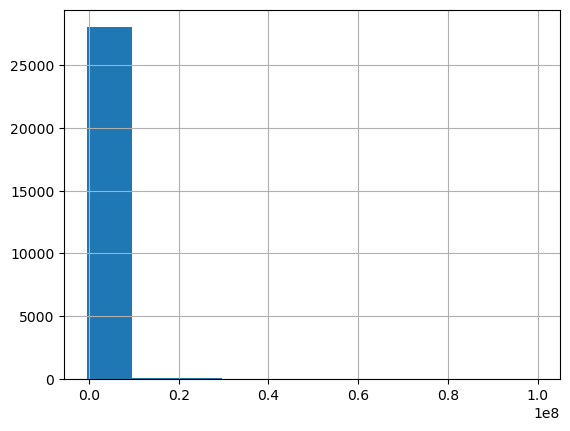

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

In [21]:
# 2. 

df['Foreign Gift Amount'].hist()
plt.show()

df['Foreign Gift Amount'].describe()


> Total giving has an outrageously long tail. In the table, you can see the .25 quantile corresponds to gifts in the thousands (5,700), while the .75 quantile corresponds to gifts in the hundreds of thousands (376,142), and the maximum gift is in the hundreds of millions (100,000,000).

<Axes: xlabel='Gift Type', ylabel='Proportion'>

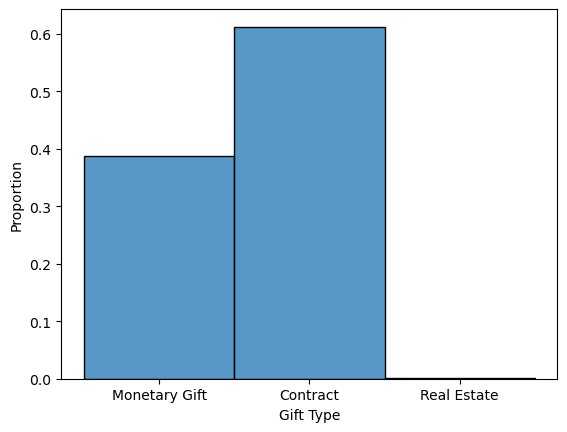

In [22]:
#3. 
sns.histplot(df['Gift Type'],stat='proportion')

> About 40% are monetary gifts, 60% are contracts, and very little corresponds to real estate.

/home/trj/miniconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='gift_ln', ylabel='Density'>

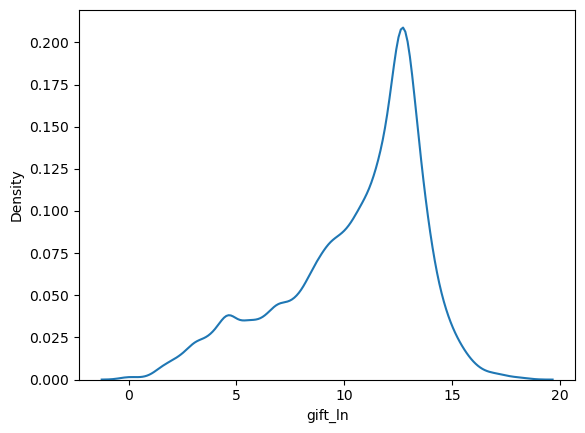

In [23]:
# 4. 
df['gift_ln'] = np.log(df['Foreign Gift Amount'])
sns.kdeplot(data=df, x='gift_ln')

<Axes: xlabel='gift_ln', ylabel='Density'>

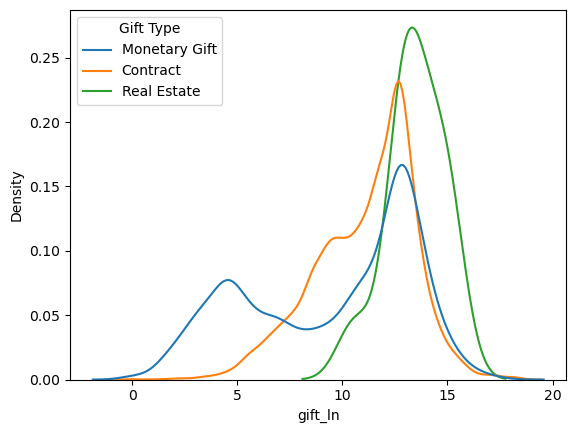

In [24]:
sns.kdeplot(data=df, x='gift_ln', hue='Gift Type', common_norm=False)

> Monetary gifts are actually bi-modal: There are a cluster of "low value" gifts around 5 and a cluster of "high value" gifts around 13. Contracts tend to be more valuable on average with a mode around 13, and real estate gifts are the most valuable with a mode around 14. From the original plot, everything looks uni-modal and the heterogeneity among gift types is not observable.

In [25]:
# 5.
table = df.loc[:,['Country of Giftor','Foreign Gift Amount']].groupby('Country of Giftor').count()
table.sort_values('Foreign Gift Amount',ascending=False)[:15]

,Foreign Gift Amount
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [26]:
table = df.loc[:,['Country of Giftor','Foreign Gift Amount']].groupby('Country of Giftor').sum()
table.sort_values('Foreign Gift Amount',ascending=False)[:15]

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [27]:
# 6. 
table = df.loc[:,['Institution Name','Foreign Gift Amount']].groupby('Institution Name').sum()
print(table.sort_values('Foreign Gift Amount',ascending=False)[:15])

                                               Foreign Gift Amount
Institution Name                                                  
Carnegie Mellon University                              1477922504
Cornell University                                      1289937761
Harvard University                                       954803610
Massachusetts Institute of Technology                    859071692
Yale University                                          613441311
Texas A&M University                                     521455050
Johns Hopkins University                                 502409595
Northwestern University                                  402316221
Georgetown University                                    379950511
University of Chicago (The)                              364544338
University of Colorado Boulder                           360173159
Duke University                                          343699498
Brigham Young University                                 32350

<Axes: ylabel='Count'>

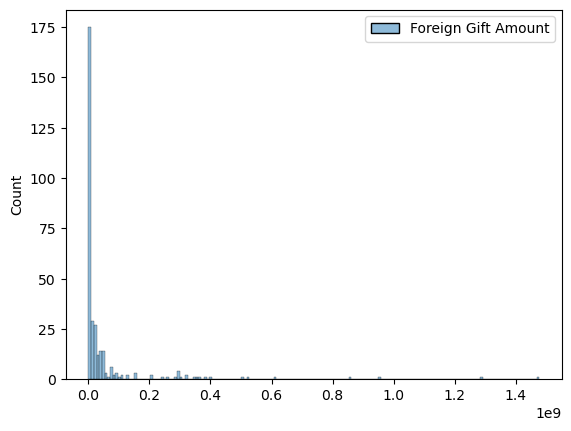

In [28]:
sns.histplot(table)


In [29]:
# 7. 
table = df.loc[:,['Giftor Name','Foreign Gift Amount']].groupby('Giftor Name').sum()
table.sort_values('Foreign Gift Amount',ascending=False)[:20]

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


In [30]:
table = df.loc[:,['Country of Giftor','Institution Name','Foreign Gift Amount']].groupby(['Institution Name','Country of Giftor']).sum()
table.sort_values('Foreign Gift Amount',ascending=False)[:20]

,,Foreign Gift Amount
Institution Name,Country of Giftor,
Cornell University,QATAR,1018473315
Carnegie Mellon University,BERMUDA,750000000
Texas A&M University,QATAR,504099350
Carnegie Mellon University,QATAR,425410702
Georgetown University,QATAR,327128310
Northwestern University,QATAR,311148564
Brigham Young University,CANADA,259927758
University of Colorado Boulder,UNITED ARAB EMIRATES,219734835
Harvard University,ENGLAND,188328288


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.


In [31]:
df = pd.read_csv('./data/college_completion.csv',low_memory=False)

2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.


In [32]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

df.head()

There are 3798 rows and 63 columns


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


3. Cross tabulate `control` and `level`. Describe the patterns you see in words.


In [33]:
print(pd.crosstab(df['control'],df['level']),'\n')
print(pd.crosstab(df['control'],df['level'], normalize = 'all'),'\n')

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 

level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403 



> Most institutions (31%) are private non-for-profit, 4-year colleges. The next most common are public two-year institutions with 24% of the population, then public 4-year and private for-profit 2-year/4-year are all around 12-17%. Most institutions are 4-year and most institutions are public, but that hides a lot of heterogeneity across the categories.

4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?

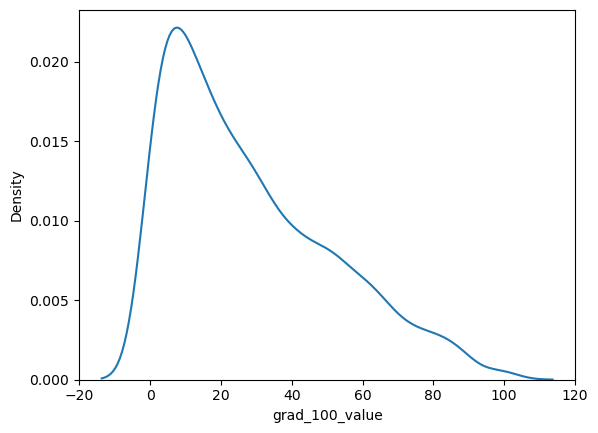

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


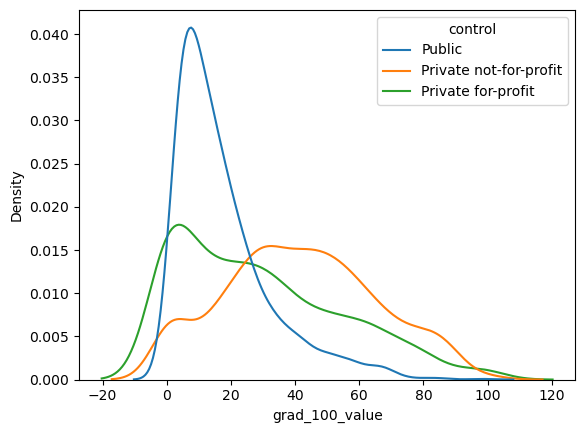

                       grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8  


In [34]:
sns.kdeplot(df['grad_100_value'])
plt.show()
print(df['grad_100_value'].describe())
sns.kdeplot(x=df['grad_100_value'],
            hue=df['control'],
            common_norm=False)
plt.show()
print((df.loc[:,['grad_100_value','control'] ]
       .groupby('control')
       .describe())
)


5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

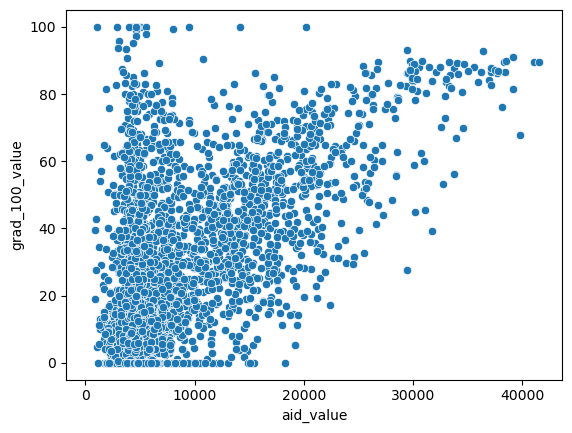

                   aid_value  grad_100_value
aid_value       4.121201e+07    88610.483169
grad_100_value  8.861048e+04      543.483382
                aid_value  grad_100_value
aid_value        1.000000        0.575879
grad_100_value   0.575879        1.000000


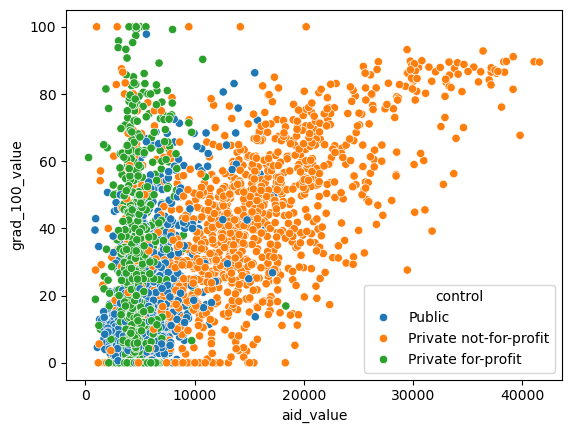

                                          aid_value  grad_100_value
control                                                            
Private for-profit     aid_value       1.957540e+06     6897.524957
                       grad_100_value  6.897525e+03      655.446387
Private not-for-profit aid_value       6.041488e+07   109274.123337
                       grad_100_value  1.092741e+05      554.660462
Public                 aid_value       4.564360e+06    15355.146212
                       grad_100_value  1.535515e+04      216.956489
                                       aid_value  grad_100_value
control                                                         
Private for-profit     aid_value        1.000000        0.188363
                       grad_100_value   0.188363        1.000000
Private not-for-profit aid_value        1.000000        0.601591
                       grad_100_value   0.601591        1.000000
Public                 aid_value        1.000000        0.482481
 

In [35]:
sns.scatterplot(x=df['aid_value'],
                y=df['grad_100_value'])
plt.show()
print(df.loc[:,['aid_value', 'grad_100_value'] ].cov())
print(df.loc[:,['aid_value', 'grad_100_value'] ].corr())

sns.scatterplot(x=df['aid_value'],
                y=df['grad_100_value'],
                hue = df['control'])
plt.show()
print(df.loc[:,['aid_value', 'control', 'grad_100_value'] ].groupby('control').cov())
print(df.loc[:,['aid_value', 'control', 'grad_100_value'] ].groupby('control').corr())


> You can see that once we break it out by control, the correlation between aid and graduation rate increases for private-not-for-profit, while the others fall, relative to the pooled estimate. When we average correlations across groups, it drags the number towards the average. Similarly, the plot is much easier to interpret: There's really three groups, with different patterns of correlation between aid and graduation rate.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

1. 

\begin{alignat*}{2}
m(a + bX) &=& \dfrac{1}{N} \sum_{i=1}^N (a + b \times x_i)\\
&=& \dfrac{1}{N} \sum_{i=1}^N a + b \dfrac{1}{N} \sum_{i=1}^N x_i \\
&=& \dfrac{1}{N} N a + b M(X) \\
&=& a + b \times M(X) 
\end{alignat*}

2. 

\begin{alignat*}{2}
\text{cov}(X,X) &=& \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))( x_i - m(X)) \\
&=& \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2\\
&=& s^2
\end{alignat*}

3. 

\begin{alignat*}{2}
\text{cov}(a+bX,a+bX) &=& \dfrac{1}{N} \sum_{i=1}^N (a + bx_i - m(a+bX))(a+b x_i - m(a+b X)) \\
 &=& \dfrac{1}{N} \sum_{i=1}^N (a + bx_i - a - b m(X))(a+b x_i - a - b m(X))) \\
  &=& \dfrac{1}{N} \sum_{i=1}^N ( bx_i - b m(X))(b x_i - b m(X))) \\
   &=& b^2 \dfrac{1}{N} \sum_{i=1}^N ( x_i -  m(X))( x_i -  m(X))) \\
     &=& b^2 \text{cov}(X,X)
\end{alignat*}

4. 

\begin{alignat*}{2}
\text{cov}(a+bX,a+bY) &=& \dfrac{1}{N} \sum_{i=1}^N (a +bx_i - m(a+bX))(a+b y_i - m(a+b Y)) \\
&=& \dfrac{1}{N} \sum_{i=1}^N (a + bx_i -a - b m(X))(a+b y_i - a- b m(Y))\\
&=& \dfrac{1}{N} \sum_{i=1}^N b^2 (x_i - m(X))(y_i - m(Y))\\
&=& b^2 \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))( y_i -  m(Y))\\
&=& b^2 \times \text{cov}(X,Y)
\end{alignat*}


5. If you take any transformation of $X$ that doesn't change the rank of the values of $X$, the "middle value" or median will be the same. For the same reasons that outliers don't affect the median, a non-decreasing transformation of any quantile/percentile (particularly the median) is just the transformed value of the quantile/percentile. More formally, if you use a non-decreasing function $g()$ on each observation $x_i$, the median index $i$ remains in the middle, and $g(x_i)$ is the transformed median. This is true for any of the rank statistics: IQR, median, percentiles, quantiles, range, etc. What is considered an outlier might change, because the space between the points can be affected by the transformation $g()$.

6. Let's use a simple example:

In [36]:
df = pd.read_csv('./data/ames_prices.csv')
X = df['price']

print( f'Mean of X: {np.mean(X)}' )
print( f'Mean of X**2: {np.mean( X**2 )}')
print( f'The square of the mean: {np.mean(X) **2 }')
print( f'Mean of sqrt(X): {np.mean( np.sqrt( X ) )}')
print( f'The root of the mean: {np.sqrt( np.mean(X) ) }')

Mean of X: 180796.0600682594
Mean of X**2: 39066920834.61911
The square of the mean: 32687215336.205658
Mean of sqrt(X): 416.26208312676425
The root of the mean: 425.20119951413517


> These are not the same. The take-away here is that transformations that aren't "linear" don't behave as expected with statistics like mean and covariance, even if they do with the median. In particular, unless $g(x) = a + bX$, $g(m(X))\neq m(g(X))$

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
2. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
3. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
4. Make a dummy variable indicating that an observation is an outlier.
5. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [37]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('./data/ames_prices.csv')
df.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


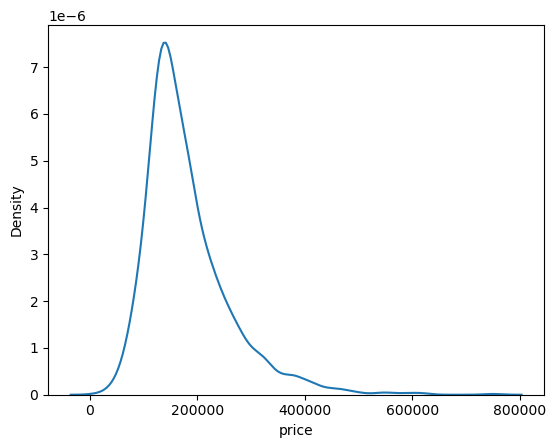

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

In [38]:
# 1. 

sns.kdeplot(df['price'])
plt.show()

df['price'].describe()

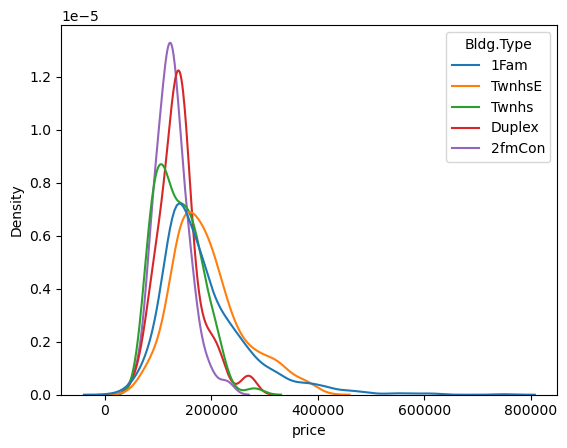

price                                                            \
            count           mean           std      min       25%       50%   
Bldg.Type                                                                     
1Fam       2425.0  184812.041237  82821.802329  12789.0  130000.0  165000.0   
2fmCon       62.0  125581.709677  31089.239840  55000.0  106562.5  122250.0   
Duplex      109.0  139808.935780  39498.973534  61500.0  118858.0  136905.0   
Twnhs       101.0  135934.059406  41938.931130  73000.0  100500.0  130000.0   
TwnhsE      233.0  192311.914163  66191.738021  71000.0  145000.0  180000.0   

                               
                75%       max  
Bldg.Type                      
1Fam       220000.0  755000.0  
2fmCon     140000.0  228950.0  
Duplex     153337.0  269500.0  
Twnhs      170000.0  280750.0  
TwnhsE     222000.0  392500.0

In [39]:
sns.kdeplot(x=df['price'],hue=df['Bldg.Type'],common_norm=False)
plt.show()

df.loc[:,['price','Bldg.Type']].groupby('Bldg.Type').describe()

> The most expensive are the end-of-row townhomes and single family homes, which each have substantially more privacy. The end-of-row townhomes have the highest variance, exhibiting a lot of uncertainty abou the sale price. 

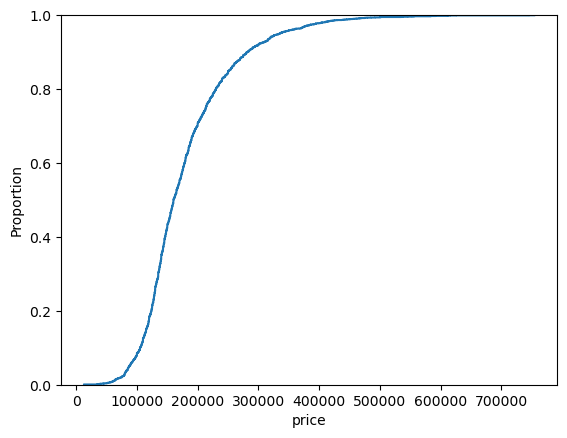

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

In [40]:
# 2. 

sns.ecdfplot(df['price'])
plt.show()

df['price'].describe()

<Axes: xlabel='price'>

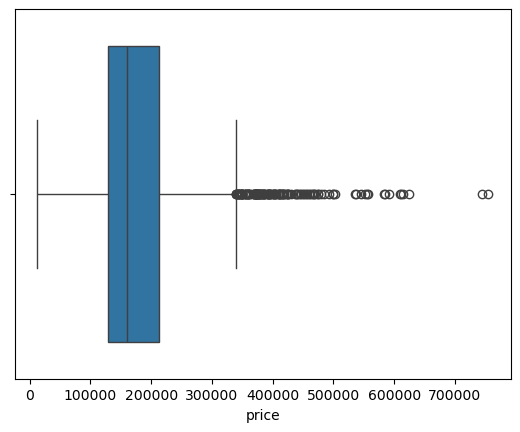

In [41]:
# 3.

sns.boxplot(x=df['price'])

<Axes: xlabel='price'>

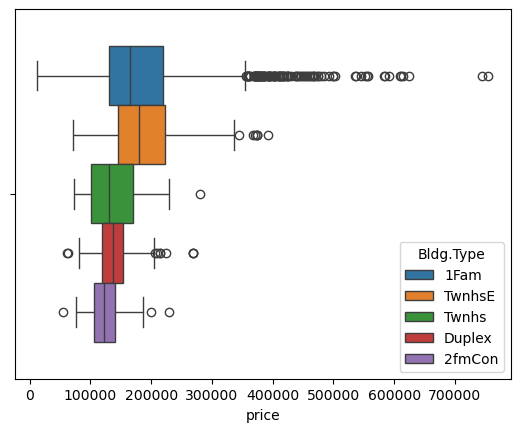

In [42]:
sns.boxplot(x=df['price'], hue=df['Bldg.Type'])

> Single family homes has the largest IQR, whiskers, and outliers. The other groups have some outliers but are mostly less variable than single family homes.

In [43]:
# 4. 

iqr = np.quantile(df['price'], .75) - np.quantile(df['price'], .25)

upper_whisker = np.quantile(df['price'], .75) + 1.5 * iqr
lower_whisker = np.quantile(df['price'], .25) - 1.5 * iqr

is_upper_outlier = df['price']>upper_whisker
is_lower_outlier = df['price']<lower_whisker

df['price_outlier'] = is_upper_outlier + is_lower_outlier


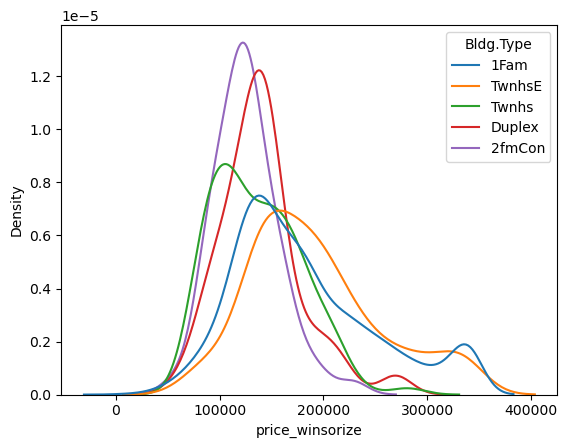

price_winsorize                                                  \
                    count           mean           std      min       25%   
Bldg.Type                                                                   
1Fam               2425.0  180417.359588  69177.514863  12789.0  130000.0   
2fmCon               62.0  125581.709677  31089.239840  55000.0  106562.5   
Duplex              109.0  139808.935780  39498.973534  61500.0  118858.0   
Twnhs               101.0  135934.059406  41938.931130  73000.0  100500.0   
TwnhsE              233.0  191349.420601  63715.987930  71000.0  145000.0   

                                         
                50%       75%       max  
Bldg.Type                                
1Fam       165000.0  220000.0  339500.0  
2fmCon     122250.0  140000.0  228950.0  
Duplex     136905.0  153337.0  269500.0  
Twnhs      130000.0  170000.0  280750.0  
TwnhsE     180000.0  222000.0  339500.0

In [44]:
# 5.

df['price_winsorize'] = ( (1-df['price_outlier']) * df['price'] +
                         is_upper_outlier * upper_whisker +
                         is_lower_outlier * lower_whisker )

sns.kdeplot(x=df['price_winsorize'],hue=df['Bldg.Type'],common_norm=False)
plt.show()

df.loc[:,['price_winsorize','Bldg.Type']].groupby('Bldg.Type').describe()

> First, check out the plot below, just to make sure you understand what we did with the winsorizing. 

> The maximum values for single family homes were rounded down significantly, from a maximum of 755,000 to 339,500. For exterior townhomes, there's a drop from 392,500 to 339,500, but otherwise no changes. So we've ironed out the prices for some very expensive mansions, which has also reduced the mean by 4,000 and standard deviation by 14,000 for single family homes.

price_outlier,False,True
Bldg.Type,,
1Fam,2295,130
2fmCon,62,0
Duplex,109,0
Twnhs,101,0
TwnhsE,226,7


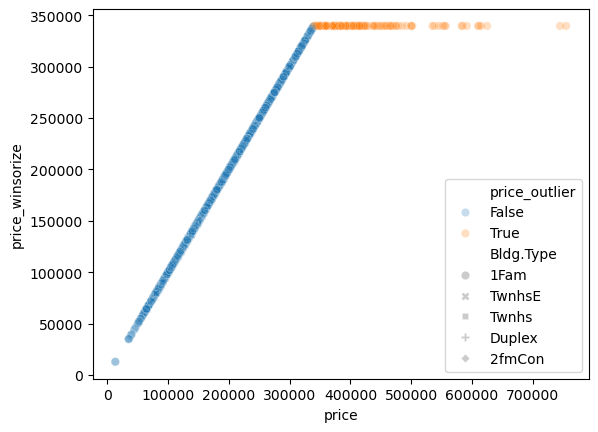

In [46]:
sns.scatterplot(x=df['price'], 
                y=df['price_winsorize'], 
                hue = df['price_outlier'],
                style = df['Bldg.Type'],
                alpha=.25)

pd.crosstab( df['Bldg.Type'], df['price_outlier'])